In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
models = ['baseline', 'rf', 'dt', 'knn', 'xgb', 'lr', 'nb', 'mlp', 'svm']
features = ['%sys', '%memused']

In [5]:
data = {}

for model in models:
    df = pd.read_csv("results3/{0}.csv".format(model), sep=';')
    data[model] = {
                    "sys_mean" : df[features].replace(',','.',regex=True).astype(float).describe()['%sys']['mean'], 
                    "sys_std"  : df[features].replace(',','.',regex=True).astype(float).describe()['%sys']['std'], 
                    "sys_max"  : df[features].replace(',','.',regex=True).astype(float).describe()['%sys']['max'], 
                    "sys_min"  : df[features].replace(',','.',regex=True).astype(float).describe()['%sys']['min'],
                    "mem_mean" : df[features].replace(',','.',regex=True).astype(float).describe()['%memused']['mean'], 
                    "mem_std"  : df[features].replace(',','.',regex=True).astype(float).describe()['%memused']['std'], 
                    "mem_max"  : df[features].replace(',','.',regex=True).astype(float).describe()['%memused']['max'], 
                    "mem_min"  : df[features].replace(',','.',regex=True).astype(float).describe()['%memused']['min']
                  }


In [6]:
df.columns.values

array(['# hostname', 'interval', 'timestamp', 'CPU', '%usr', '%nice',
       '%sys', '%iowait', '%steal', '%irq', '%soft', '%guest', '%gnice',
       '%idle[...]', 'kbmemfree', 'kbavail', 'kbmemused', '%memused',
       'kbbuffers', 'kbcached', 'kbcommit', '%commit', 'kbactive',
       'kbinact', 'kbdirty', 'kbanonpg', 'kbslab', 'kbkstack', 'kbpgtbl',
       'kbvmused', 'IFACE', 'rxpck/s', 'txpck/s', 'rxkB/s', 'txkB/s',
       'rxcmp/s', 'txcmp/s', 'rxmcst/s', '%ifutil[...]', 'IFACE.1',
       'rxerr/s', 'txerr/s', 'coll/s', 'rxdrop/s', 'txdrop/s', 'txcarr/s',
       'rxfram/s', 'rxfifo/s', 'txfifo/s[...]', 'call/s', 'retrans/s',
       'read/s', 'write/s', 'access/s', 'getatt/s', 'scall/s',
       'badcall/s', 'packet/s', 'udp/s', 'tcp/s', 'hit/s', 'miss/s',
       'sread/s', 'swrite/s', 'saccess/s', 'sgetatt/s', 'totsck',
       'tcpsck', 'udpsck', 'rawsck', 'ip-frag', 'tcp-tw', 'irec/s',
       'fwddgm/s', 'idel/s', 'orq/s', 'asmrq/s', 'asmok/s', 'fragok/s',
       'fragcrt/s', 'ihd

In [7]:
# features with variance greater than zero
m=df.var()>0
df_filtered = df.loc[:, m.reindex(df.columns, axis=1, fill_value=False)]
df_filtered.columns.values

array(['%usr', '%sys', '%iowait', '%soft', '%idle[...]', 'kbmemfree',
       'kbavail', 'kbmemused', '%memused', 'kbbuffers', 'kbcached',
       'kbcommit', '%commit', 'kbactive', 'kbinact', 'kbdirty',
       'kbanonpg', 'kbslab', 'kbkstack', 'kbpgtbl', 'kbvmused', 'rxpck/s',
       'txpck/s', 'rxkB/s', 'txkB/s', '%ifutil[...]', 'totsck', 'irec/s',
       'idel/s', 'orq/s', 'passive/s', 'iseg/s', 'oseg/s', 'tcp6sck',
       'total/s'], dtype=object)

In [8]:
x_pos = np.arange(len(models))
sys_mean = [value['sys_mean'] for value in data.values()]
sys_std = [value['sys_std'] for value in data.values()]

In [9]:
plt.style.use('plot_style.txt')

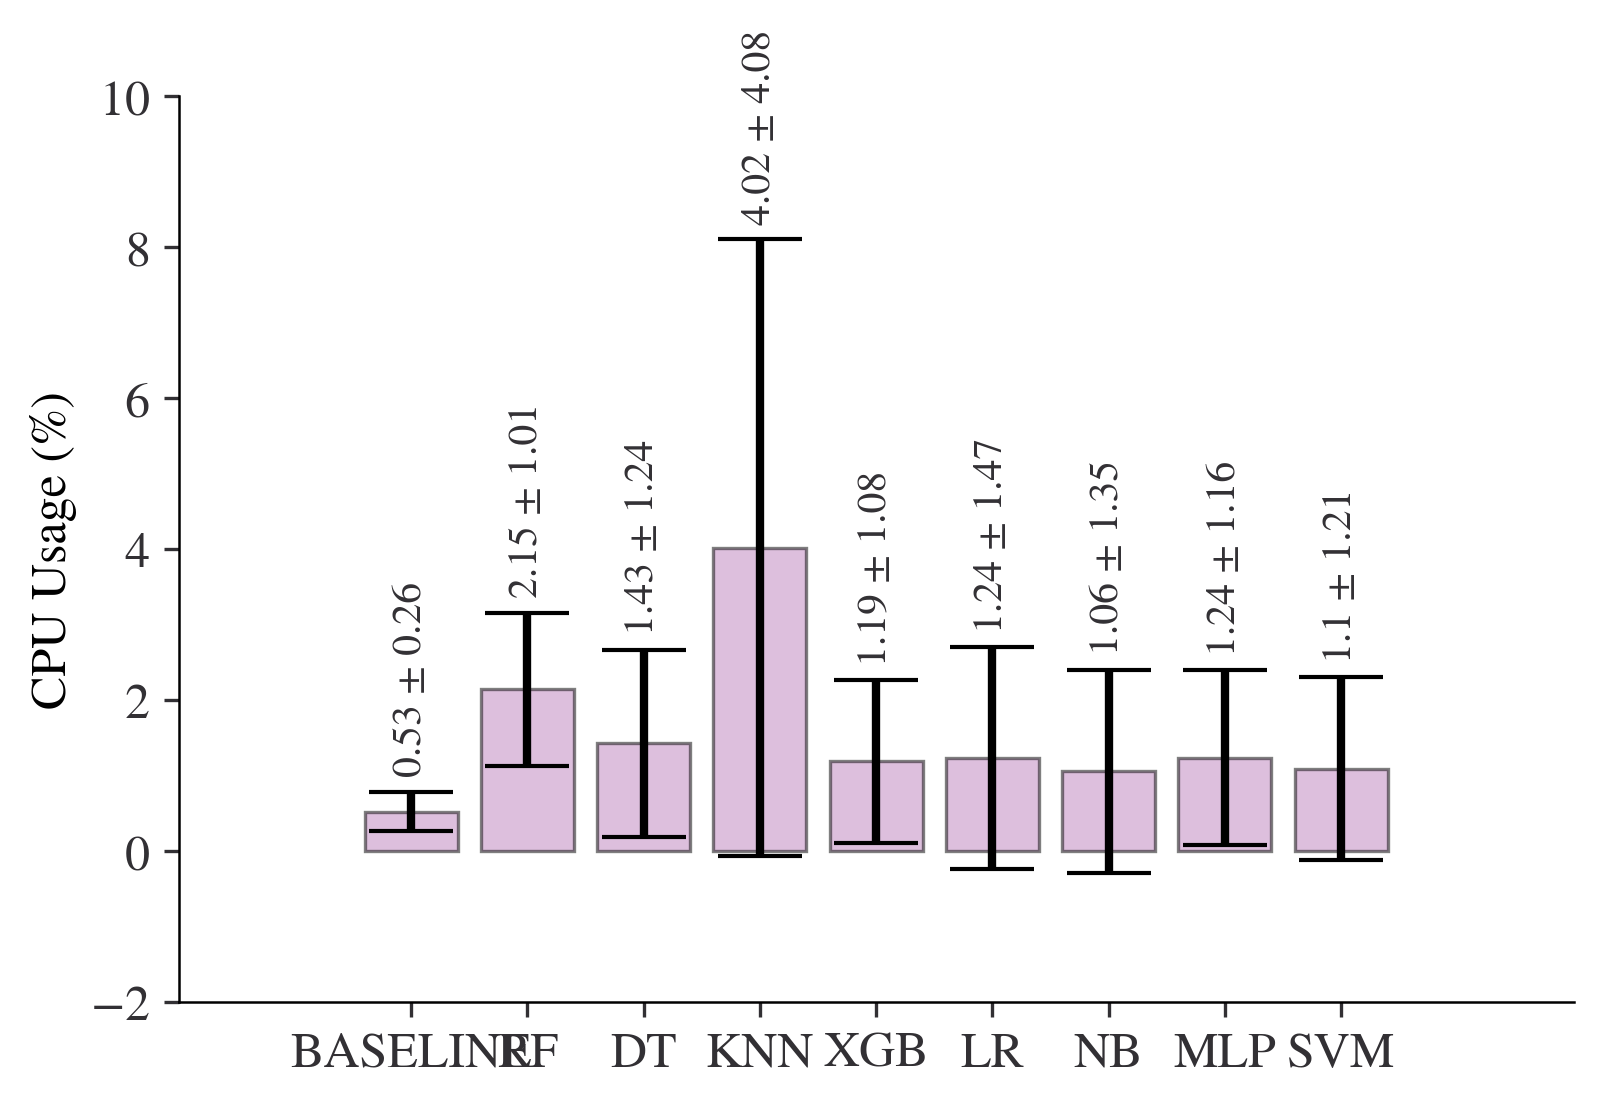

In [10]:
import os
fig, ax = plt.subplots()
ax.bar(x_pos, sys_mean, yerr=sys_std, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('CPU Usage (%)')
ax.set_xticks(x_pos)
ax.set_xticklabels(model.upper() for model in models)
for i in range(0, len(sys_mean)):
    plt.text(i, sys_mean[i]+sys_std[i]+0.2, str(round(sys_mean[i],2))+" ± "+str(round(sys_std[i],2)), ha="center", va="bottom", rotation=90)
#plt.savefig(os.path.join('images/', 'cpu_usage_ml_models.pdf'), dpi=300, bbox_inches = "tight")
plt.show()

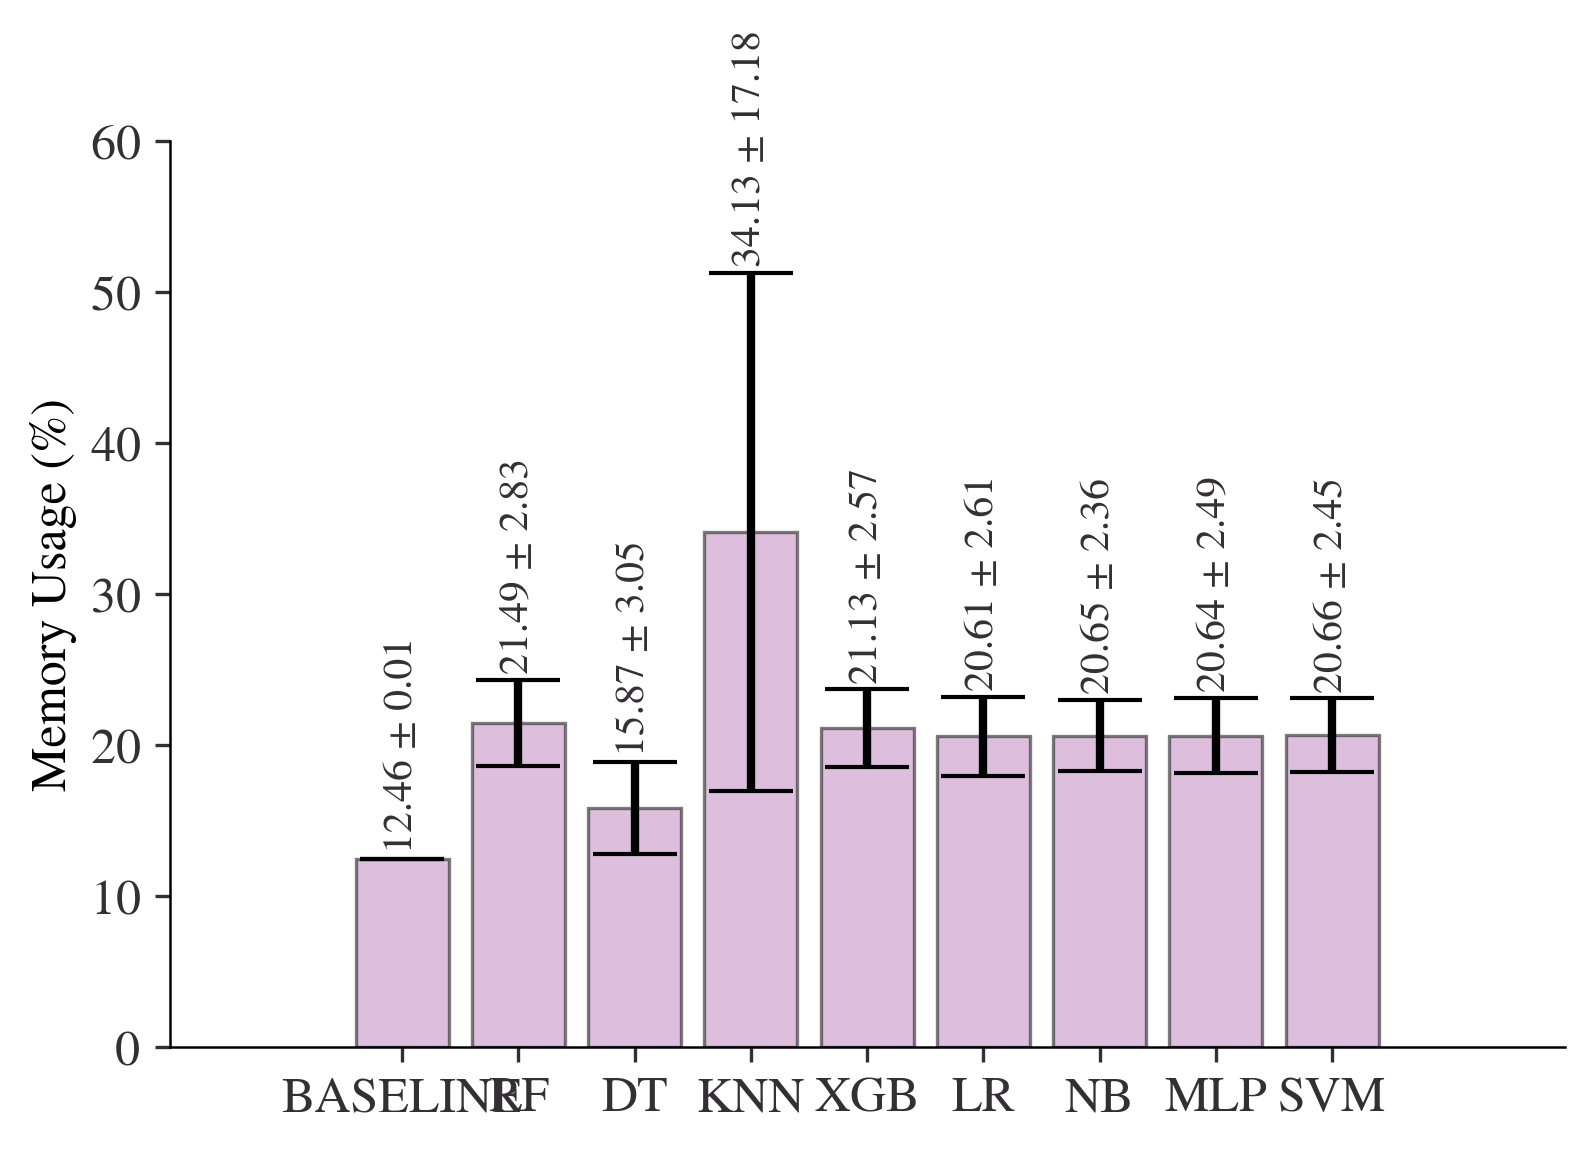

In [11]:
x_pos = np.arange(len(models))
mem_mean = [value['mem_mean'] for value in data.values()]
mem_std = [value['mem_std'] for value in data.values()]

fig, ax = plt.subplots()
ax.bar(x_pos, mem_mean, yerr=mem_std, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Memory Usage (%)')
ax.set_xticks(x_pos)
ax.set_xticklabels(model.upper() for model in models)
for i in range(0, len(mem_mean)):
    plt.text(i, mem_mean[i]+mem_std[i]+0.4, str(round(mem_mean[i],2))+" ± "+str(round(mem_std[i],2)), ha="center", va="bottom", rotation=90)
#plt.savefig(os.path.join('images/', 'mem_usage_ml_models.pdf'), dpi=300, bbox_inches = "tight")
plt.show()

---

## Violin and Boxplot

In [13]:
data = {}

for model in models:
    df = pd.read_csv("results3/{0}.csv".format(model), sep=';')
    data[model] = {
                    "sys" : df[features]['%sys'].replace(',','.',regex=True).astype(float), 
                    "mem" : df[features]['%memused'].replace(',','.',regex=True).astype(float), 
                  }


In [14]:
data

{'baseline': {'sys': 0     0.00
  1     0.25
  2     0.25
  3     0.51
  4     0.76
  5     0.51
  6     0.51
  7     0.76
  8     0.76
  9     0.51
  10    0.25
  11    0.51
  12    0.76
  13    0.76
  14    0.25
  15    0.76
  16    0.51
  17    0.51
  18    0.51
  19    1.26
  20    0.25
  21    0.51
  22    0.50
  Name: %sys, dtype: float64,
  'mem': 0     12.46
  1     12.46
  2     12.46
  3     12.46
  4     12.46
  5     12.46
  6     12.46
  7     12.46
  8     12.46
  9     12.46
  10    12.46
  11    12.46
  12    12.45
  13    12.45
  14    12.45
  15    12.45
  16    12.45
  17    12.45
  18    12.45
  19    12.45
  20    12.45
  21    12.45
  22    12.45
  Name: %memused, dtype: float64},
 'rf': {'sys': 0     3.02
  1     2.02
  2     4.79
  3     1.26
  4     0.50
  5     3.79
  6     1.00
  7     2.02
  8     0.25
  9     2.03
  10    2.30
  11    2.28
  12    1.79
  13    2.79
  14    2.81
  15    1.78
  16    2.54
  17    1.79
  18    2.30
  19    2.54
  20    1.79
  

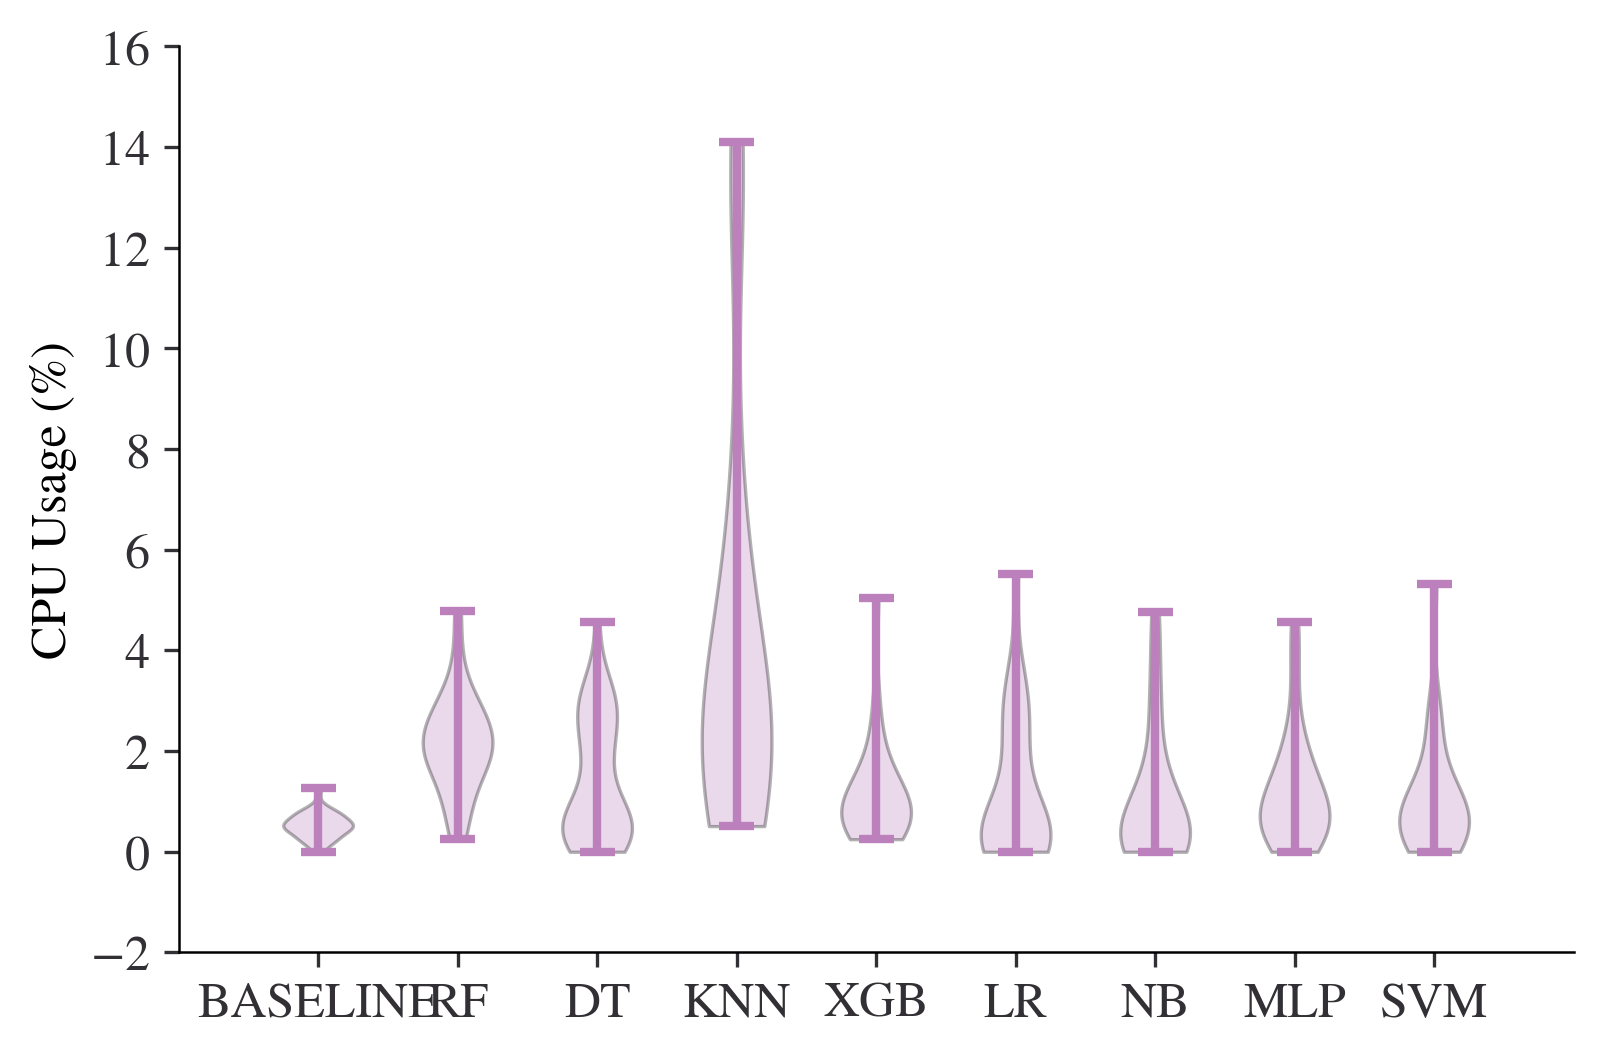

In [31]:
plot_sys = []

x_pos = np.arange(len(models))


fig, ax = plt.subplots()
for model in models:
    plot_sys.append(data[model]['sys'])

ax.set_ylabel('CPU Usage (%)')
#ax.set_xticks(x_pos+1)
#ax.set_xticklabels(model.upper() for model in models)



ax.violinplot(plot_sys);
plt.xticks(x_pos+1, [model.upper() for model in models])
#plt.savefig(os.path.join('images/', 'cpu_usage_ml_models_violin.pdf'), dpi=300, bbox_inches = "tight")
# plt.show()
plt.savefig('inet_memuse.png')

In [28]:
os.getcwd()

'/home/phloem/Workspace/Uni/4sem/spzc/project/AB-TRAP/5_Performance Evaluation/Internet'

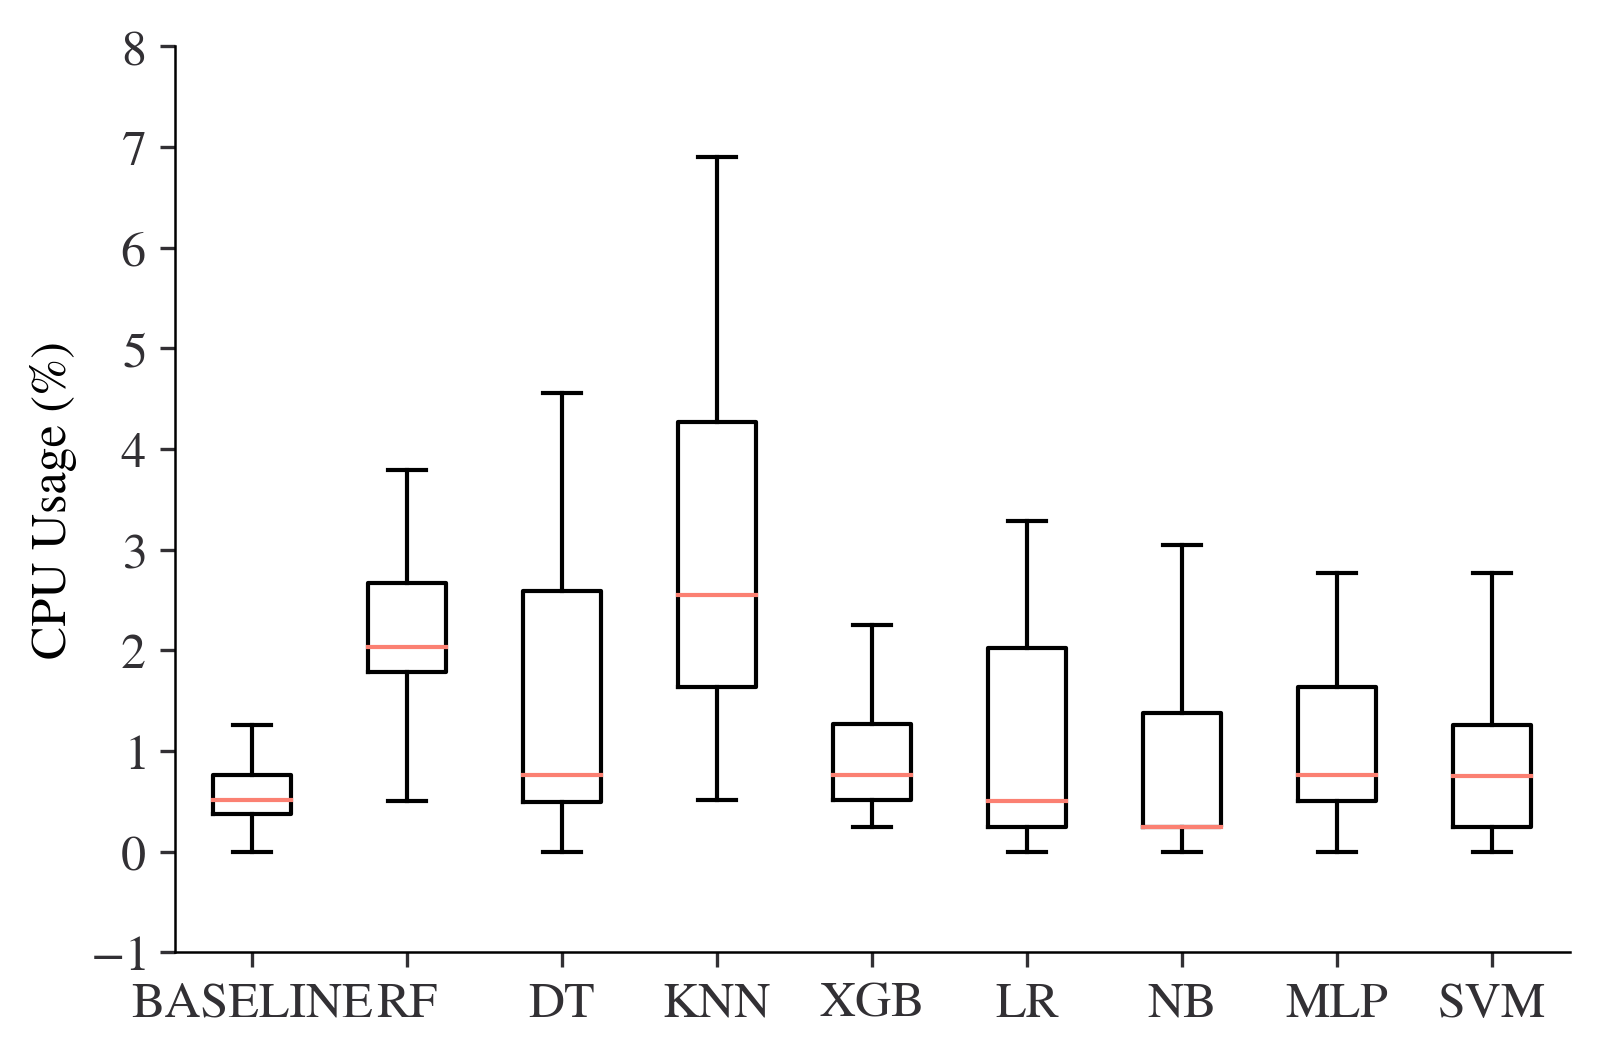

In [16]:
plot_sys = []

x_pos = np.arange(len(models))


fig, ax = plt.subplots()
for model in models:
    plot_sys.append(data[model]['sys'])

ax.set_ylabel('CPU Usage (%)')
#ax.set_xticks(x_pos+1)
#ax.set_xticklabels(model.upper() for model in models)



ax.boxplot(plot_sys, showfliers=False);
plt.xticks(x_pos+1, [model.upper() for model in models])
#plt.savefig(os.path.join('images/', 'cpu_usage_ml_models_boxplot.pdf'), dpi=300, bbox_inches = "tight")
plt.show()

In [17]:
[model.upper() for model in models]

['BASELINE', 'RF', 'DT', 'KNN', 'XGB', 'LR', 'NB', 'MLP', 'SVM']

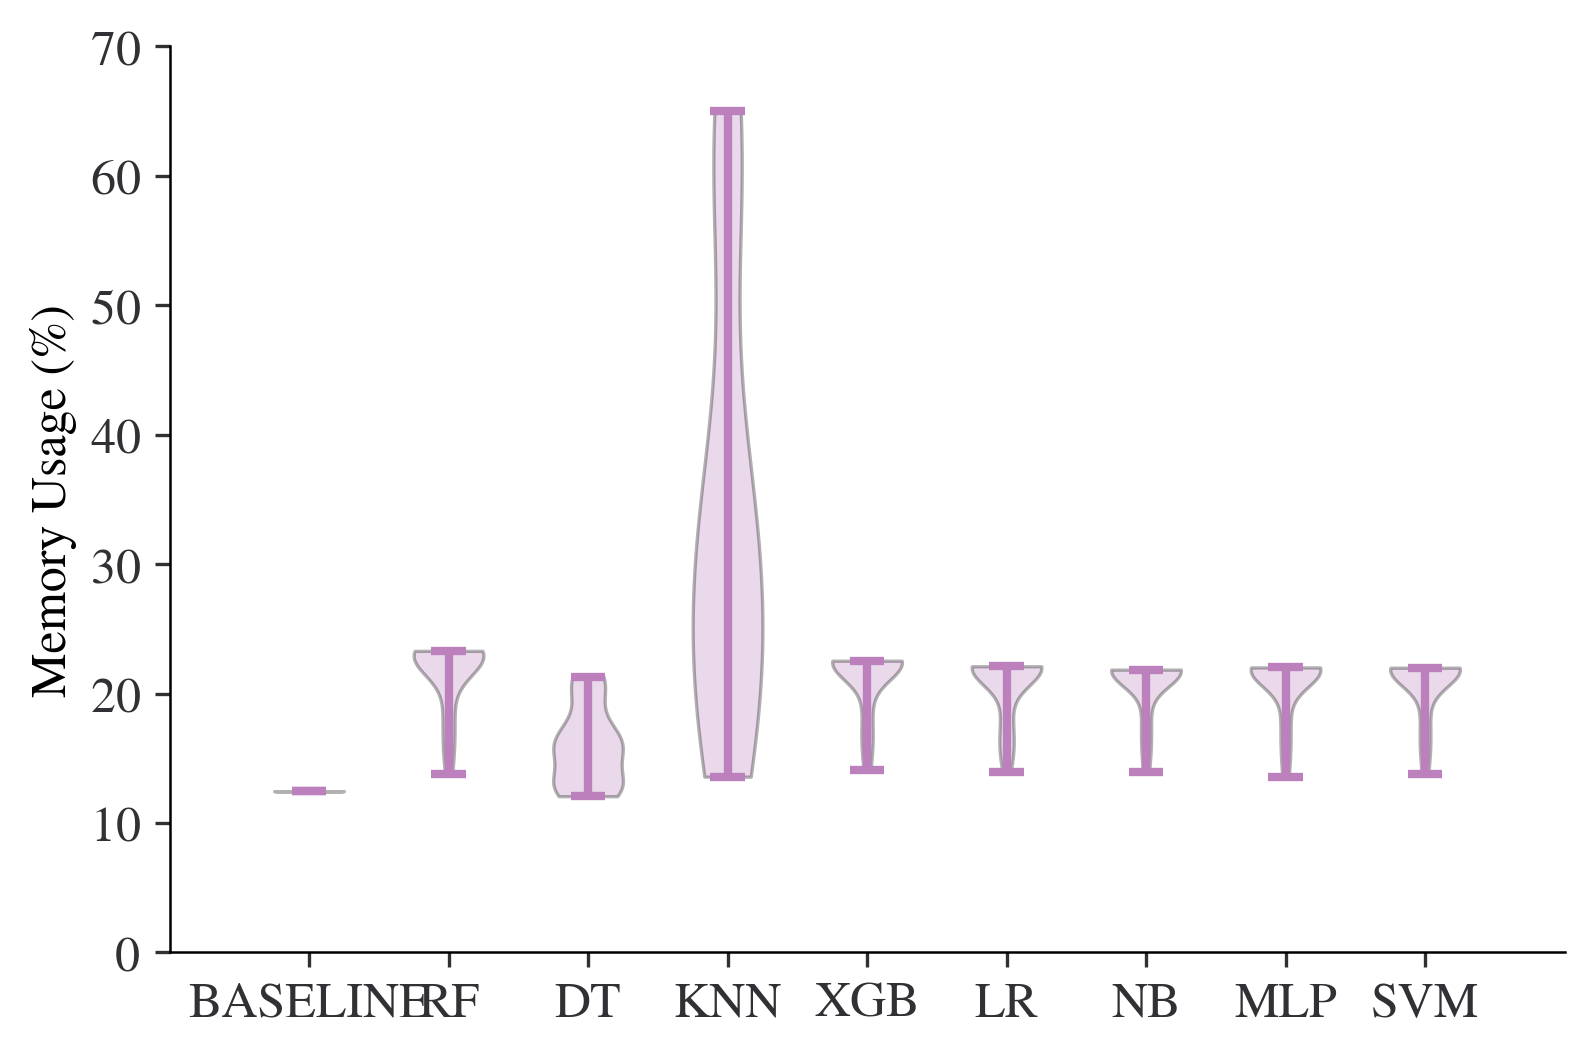

In [30]:
plot_mem = []

x_pos = np.arange(len(models))


fig, ax = plt.subplots()
for model in models:
    plot_mem.append(data[model]['mem'])

ax.set_ylabel('Memory Usage (%)')
#ax.set_xticks(x_pos+1)
#ax.set_xticklabels(model.upper() for model in models)

ax.violinplot(plot_mem);
plt.xticks(x_pos+1, [model.upper() for model in models])
#plt.savefig(os.path.join('images/', 'mem_usage_ml_models_violin.pdf'), dpi=300, bbox_inches = "tight")
#plt.show()
plt.savefig('inet_cpuse.png')

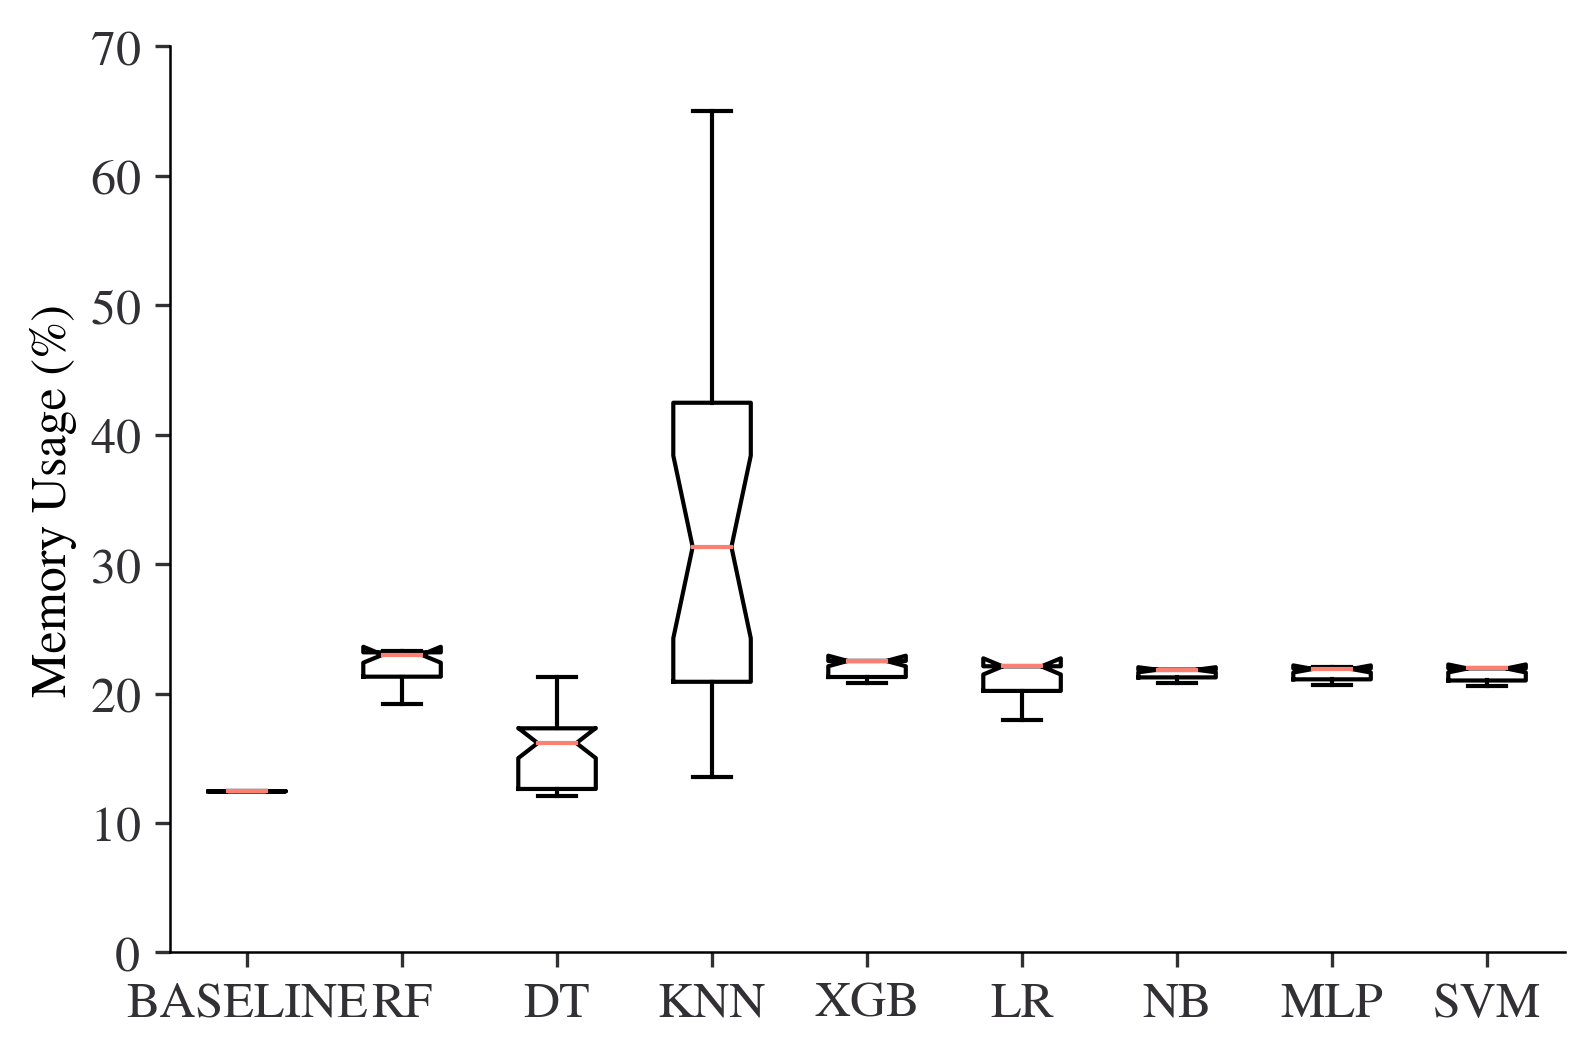

In [19]:
plot_mem = []

x_pos = np.arange(len(models))


fig, ax = plt.subplots()
for model in models:
    plot_mem.append(data[model]['mem'])

ax.set_ylabel('Memory Usage (%)')
#ax.set_xticks(x_pos+1)
#ax.set_xticklabels(model.upper() for model in models)

ax.boxplot(plot_mem, showfliers=False, notch=True);
plt.xticks(x_pos+1, [model.upper() for model in models])
#plt.savefig(os.path.join('images/', 'mem_usage_ml_models_boxplot.pdf'), dpi=300, bbox_inches = "tight")
plt.show()

---
## Confidence Interval

In [20]:
import numpy as np
import scipy.stats


def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [21]:
for metric in ['sys', 'mem']:
    for model in models:
        mean, bottom, top = mean_confidence_interval(data[model][metric])
        print(metric, model, mean, bottom, top, (mean>bottom and mean<top))

sys baseline 0.528695652173913 0.414744061871305 0.642647242476521 True
sys rf 2.1495652173913045 1.710697182975811 2.588433251806798 True
sys dt 1.4310000000000003 1.0341994820870892 1.8278005179129113 True
sys knn 4.023913043478261 2.258612115129007 5.7892139718275155 True
sys xgb 1.193913043478261 0.7280089676175558 1.6598171193389661 True
sys lr 1.2356521739130435 0.6004489253545018 1.8708554224715852 True
sys nb 1.0608695652173912 0.4782037381350379 1.6435353922997444 True
sys mlp 1.2382608695652175 0.7373961540590386 1.7391255850713965 True
sys svm 1.0952173913043481 0.5704512100578275 1.6199835725508689 True
mem baseline 12.455217391304345 12.453008725735794 12.457426056872896 True
mem rf 21.491739130434784 20.266318232343934 22.717160028525633 True
mem dt 15.869 14.894667726507993 16.843332273492006 True
mem knn 34.129999999999995 26.701921462145645 41.55807853785434 True
mem xgb 21.134782608695648 20.021675951243942 22.247889266147354 True
mem lr 20.607391304347832 19.48023463

---
# Violin plots + Boxplot

In [22]:
def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals.iloc[-1]) # replaced [-1] by iloc[-1] for being Pandas Series

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value


def set_axis_style(ax, labels):
    ax.xaxis.set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Sample name')

/home/phloem/Workspace/Uni/4sem/spzc/project/AB-TRAP/venv/lib/python3.8/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


AxisError: axis 1 is out of bounds for array of dimension 1

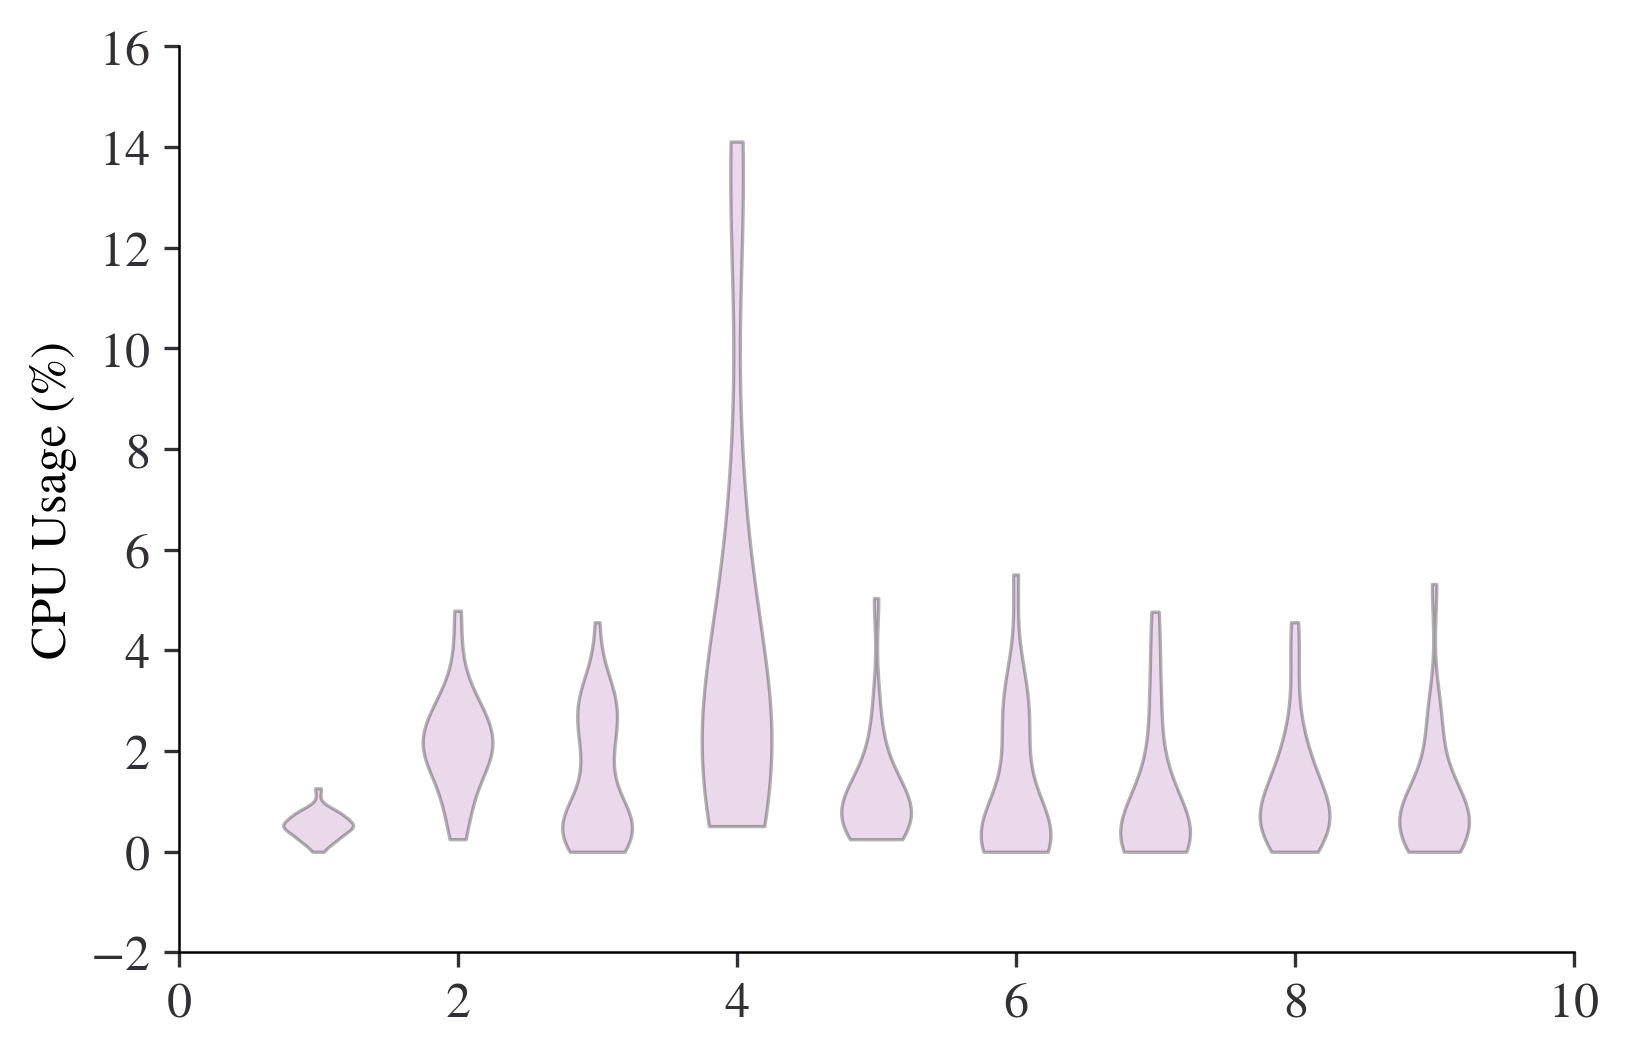

In [23]:
import numpy as np

plot_sys = []

x_pos = np.arange(len(models))

fig, ax = plt.subplots()

for model in models:
    plot_sys.append(data[model]['sys'])

ax.set_ylabel('CPU Usage (%)')

parts = ax.violinplot(
        plot_sys, showmeans=False, showmedians=False,
        showextrema=False)

#for pc in parts['bodies']:
    #pc.set_facecolor('#D43F3A')
    #pc.set_edgecolor('black')
    #pc.set_alpha(1)
    
quartile1, medians, quartile3 = np.percentile(plot_sys, [25, 50, 75], axis=1)

whiskers = np.array([adjacent_values(sorted_array, q1, q3) 
                     for sorted_array, q1, q3 in zip(plot_sys, quartile1, quartile3)])
#whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]

whiskers_min = [i.min() for i in plot_sys]
whiskers_max = [i.max() for i in plot_sys]

inds = np.arange(1, len(medians) + 1)
ax.scatter(inds, medians, marker='.', color='white', s=10, zorder=3)
ax.vlines(inds, quartile1, quartile3, linestyle='-', lw=5)
ax.vlines(inds, whiskers_min, whiskers_max, linestyle='-', lw=1)

for i, model in enumerate(models):
    if model == "baseline":
        models[i] = "none"

plt.xticks(x_pos+1, [model.upper() for model in models])
#plt.savefig(os.path.join('images/', 'cpu_usage_ml_models_violin_plus_box.pdf'), dpi=300, bbox_inches = "tight")
plt.show()

/home/phloem/Workspace/Uni/4sem/spzc/project/AB-TRAP/venv/lib/python3.8/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


AxisError: axis 1 is out of bounds for array of dimension 1

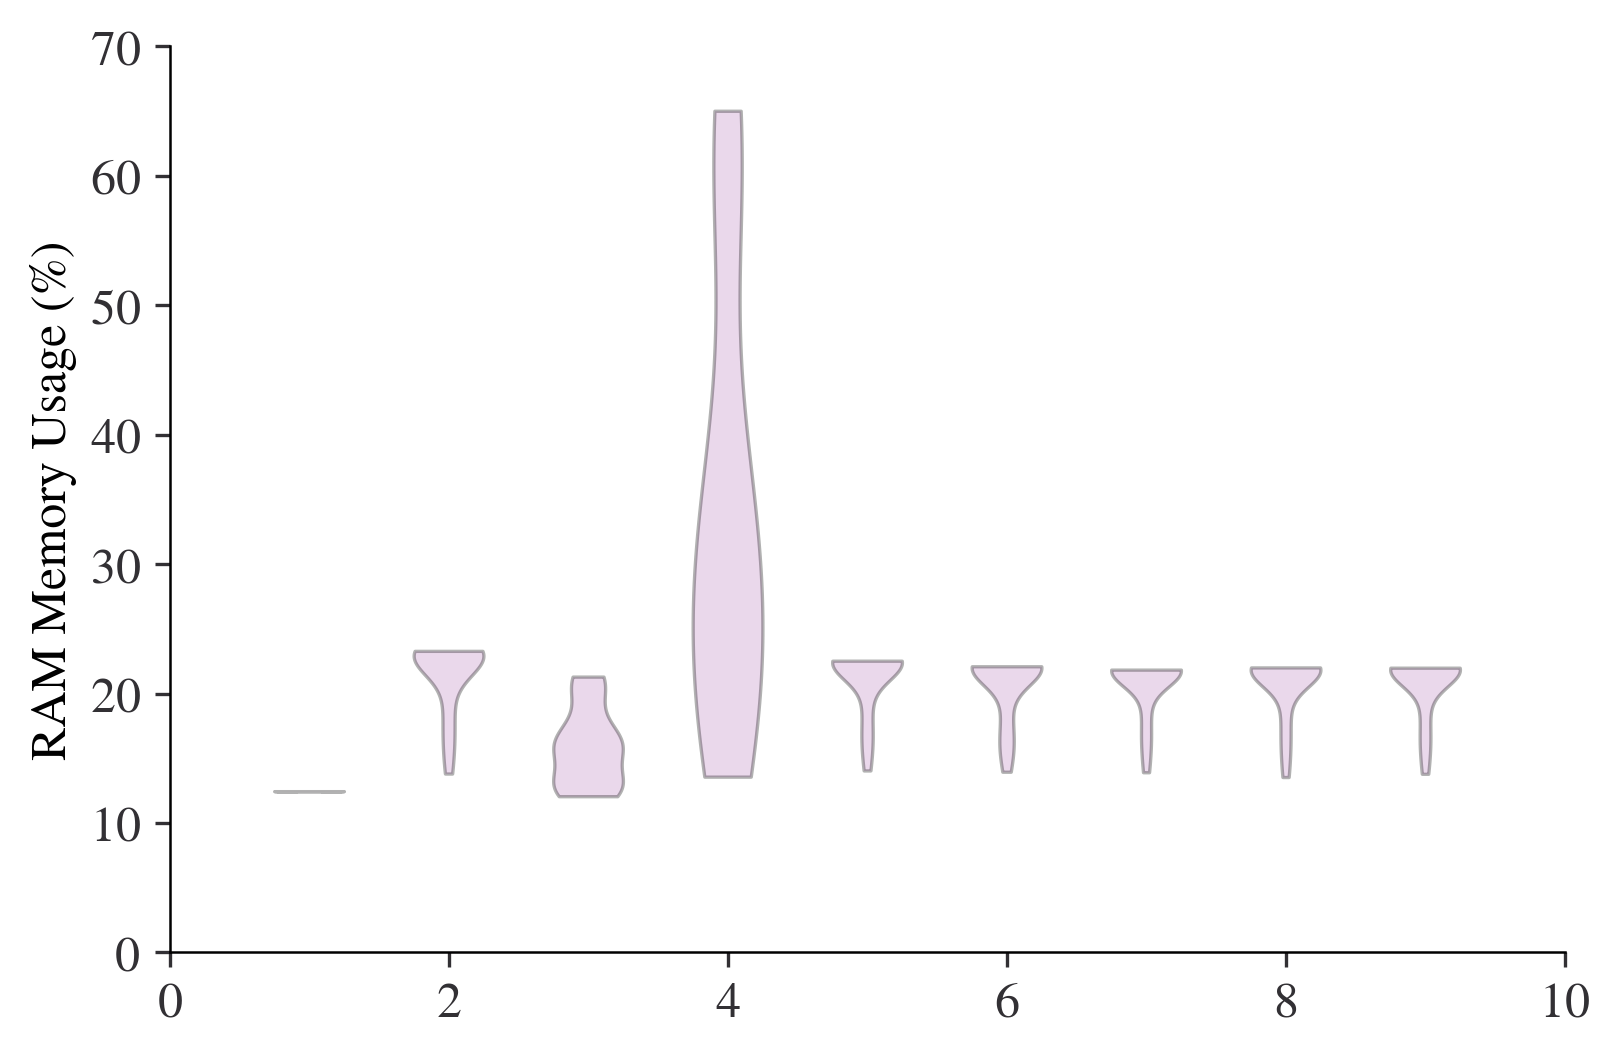

In [33]:
import numpy as np

plot_mem = []

for i, model in enumerate(models):
    if model == "none":
        models[i] = "baseline"

x_pos = np.arange(len(models))

fig, ax = plt.subplots()

for model in models:
    plot_mem.append(data[model]['mem'])

ax.set_ylabel('RAM Memory Usage (%)')

parts = ax.violinplot(
        plot_mem, showmeans=False, showmedians=False,
        showextrema=False)

#for pc in parts['bodies']:
    #pc.set_facecolor('#D43F3A')
    #pc.set_edgecolor('black')
    #pc.set_alpha(1)
    
quartile1, medians, quartile3 = np.percentile(plot_mem, [25, 50, 75], axis=1)

whiskers = np.array([adjacent_values(sorted_array, q1, q3) 
                     for sorted_array, q1, q3 in zip(plot_mem, quartile1, quartile3)])
#whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]

whiskers_min = [i.min() for i in plot_mem]
whiskers_max = [i.max() for i in plot_mem]

inds = np.arange(1, len(medians) + 1)
ax.scatter(inds, medians, marker='.', color='white', s=10, zorder=3)
ax.vlines(inds, quartile1, quartile3, linestyle='-', lw=5)
ax.vlines(inds, whiskers_min, whiskers_max, linestyle='-', lw=1)

for i, model in enumerate(models):
    if model == "baseline":
        models[i] = "none"

plt.xticks(x_pos+1, [model.upper() for model in models])
#plt.savefig(os.path.join('images/', 'mem_usage_ml_models_violin_plus_box.pdf'), dpi=300, bbox_inches = "tight")
plt.show()